In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
import torch
location_of_data = '/content/drive/My Drive/TDR/screenshots 2/train/'
location_of_data_test = '/content/drive/My Drive/TDR/screenshots 2/validate/'
listdir(location_of_data)

['2022-03-06_19.47.43.jpg',
 '2022-03-06_19.47.23.jpg',
 '2022-03-06_19.47.27.jpg',
 '2022-03-06_19.47.32.jpg',
 '2022-03-06_19.47.33.jpg',
 '2022-03-06_19.48.27.jpg',
 '2022-03-06_19.48.38.jpg',
 '2022-03-06_19.48.43.jpg',
 '2022-03-06_19.50.47.jpg',
 '2022-03-06_19.50.48.jpg',
 '2022-03-06_19.50.36.jpg',
 '2022-03-06_19.47.23.xml',
 '2022-03-06_19.47.27.xml',
 '2022-03-06_19.47.32.xml',
 '2022-03-06_19.47.33.xml',
 '2022-03-06_19.47.43.xml',
 '2022-03-06_19.48.27.xml',
 '2022-03-06_19.50.48.xml',
 '2022-03-06_19.48.38.xml',
 '2022-03-06_19.48.43.xml',
 '2022-03-06_19.50.36.xml',
 '2022-03-06_19.50.47.xml',
 '2022-03-24_20.06.20.jpg',
 '2022-03-24_20.06.27.jpg',
 '2022-03-24_20.06.32.jpg',
 '2022-03-24_20.06.33.jpg',
 '2022-03-24_20.06.42.jpg',
 '2022-03-24_20.06.45_2.jpg',
 '2022-03-24_20.06.56.jpg',
 '2022-03-24_20.07.04.jpg',
 '2022-03-24_20.07.09.jpg',
 '2022-03-24_20.06.20.xml',
 '2022-03-24_20.06.27.xml',
 '2022-03-24_20.06.32.xml',
 '2022-03-24_20.06.33.xml',
 '2022-03-24_20.06

In [3]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plt

from detecto.utils import read_image

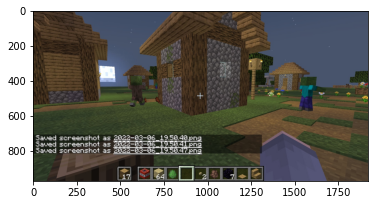

In [5]:

sample_image = '2022-03-06_19.50.48.jpg'
test_image = "2022-03-24_20.06.45.jpg"

image = read_image(location_of_data+sample_image)
imagetest = read_image(location_of_data_test+test_image)
plt.imshow(image)
plt.show()

In [6]:
from detecto.core import Dataset
dataset = Dataset(location_of_data)

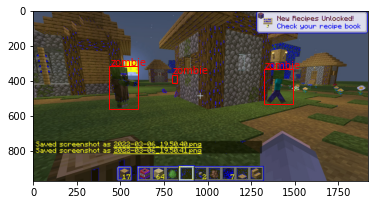

In [7]:
from detecto.visualize import show_labeled_image

image, targets = dataset[10]
show_labeled_image(image, targets['boxes'], targets['labels'])

In [8]:
from detecto.core import DataLoader, Model

labels = ['zombie','pig']

model = Model(labels)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
model.fit(dataset)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:05<00:00,  3.74it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:05<00:00,  3.72it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:05<00:00,  3.71it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:05<00:00,  3.69it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:05<00:00,  3.65it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:05<00:00,  3.67it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:06<00:00,  3.29it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:05<00:00,  3.66it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 20/20 [00:05<00:00,  3.65it/s]


In [ ]:
test_image='zombis i porcs.jpg'
image = read_image(location_of_data_test+test_image)
labels, boxes, scores = model.predict(image) #Aquesta merda està malament perquè t'està predint una de cada no pas les millors i prou

In [ ]:
print('labels', labels)
print('boxes', boxes)
print('scores', scores)
threshold = 0.8

llista_boxes = boxes.tolist()
boxes_salvats=[]
labels_salvats=[]
for i in range(len(scores)):
  if scores[i]>threshold:
    labels_salvats.append(labels[i])
    boxes_salvats.append(llista_boxes[i])

boxes_salvats = torch.FloatTensor(boxes_salvats)

labels = labels
boxes = boxes
scores = scores

labels ['pig', 'zombie', 'zombie', 'pig', 'pig', 'pig', 'zombie', 'pig', 'zombie', 'zombie', 'zombie']
boxes tensor([[ 504.6829,  499.1987,  620.5316,  576.0173],
        [ 331.7774,  420.3080,  459.0902,  586.4305],
        [1311.7085,  415.3835, 1445.8286,  650.7302],
        [1794.0042,  484.6726, 1902.1884,  533.6718],
        [1343.8995,  544.3607, 1920.0000,  974.0000],
        [ 343.9568,  436.5078,  447.9718,  590.2862],
        [1243.4602,  363.2144, 1431.2299,  668.5245],
        [1322.9562,  432.8926, 1443.5748,  662.2225],
        [ 515.3871,  506.0084,  629.4415,  570.7302],
        [1434.1558,  533.1261, 1692.8923,  974.0000],
        [1372.8745,  541.2550, 1920.0000,  974.0000]])
scores tensor([0.9649, 0.9597, 0.8969, 0.8019, 0.3371, 0.2139, 0.1939, 0.1481, 0.1001,
        0.0918, 0.0859])


In [ ]:
#IntTensor.item() per provar

#El segon és la alçada
#El primer es l'esquerra
#el tercer es la dreta
#hem de comparar el segon amb el darrer.
distancies = []
for i in boxes_salvats:
  distancies.append(str(i[3]-i[1]))

for j in range(len(distancies)):
  distancies[j] = distancies[j][7:-1]

for k in range(len(labels_salvats)):
  labels_salvats[k] = labels_salvats[k] + " " + distancies[k]

#strr = str(distancies)
#res_str = strr[:2] +  strr[3:] 
#res_str

In [ ]:
boxes_salvats

tensor([[ 504.6829,  499.1987,  620.5316,  576.0173],
        [ 331.7774,  420.3080,  459.0902,  586.4305],
        [1311.7085,  415.3835, 1445.8286,  650.7302],
        [1794.0042,  484.6726, 1902.1884,  533.6718]])

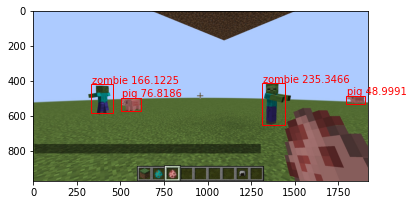

In [ ]:
from detecto.visualize import show_labeled_image
import numpy as np
show_labeled_image(image,boxes_salvats,labels_salvats) 

#per guardar el model
#balanç dataset fet a mitjes
#propera reunió despres de dijous
#El tope son 1920 nai!!!!

In [ ]:
boxes_prova = []

In [ ]:
model.save('/content/drive/My Drive/TDR/models basats.pth')

In [ ]:
#model = Model.load('your_save_file.pth', labels)